#                                      Analyzing the tips... 
Date:    9/30/2024  
Author:  Mahammad Hajiyev  
Purpose: Taking a closer look at how tips are affected by factors such as total bill, sex, smoker and etc. The analysis will be made to understand the relationship. 

### 1. Importing External Dependecies

In [110]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2. Loading Dataset into Pandas

In [111]:
df = sns.load_dataset('tips')
df = print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


### 3. Initial Data Inspection

In [112]:
df = pd.read_csv('tips.csv')
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object


### 4. Initial Descriptive Statistics

In [113]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


### 5. Initial Data Distribution for Numerical Columns

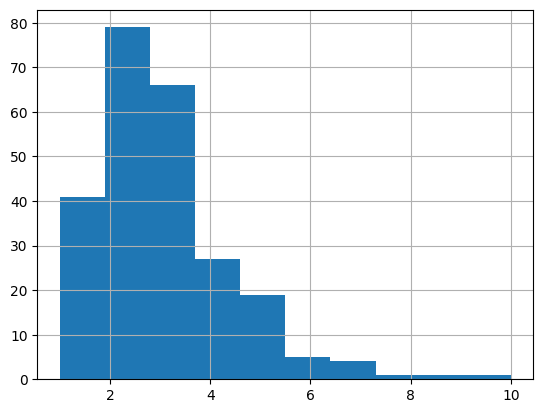

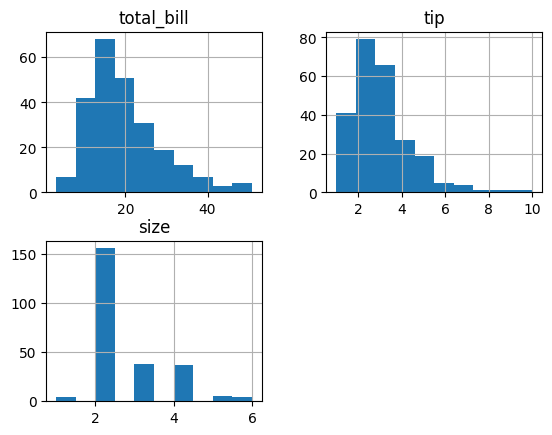

In [114]:
# Inspect histogram by numerical column
df['tip'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### 6. Initial Data Distribution for Categorical Columns

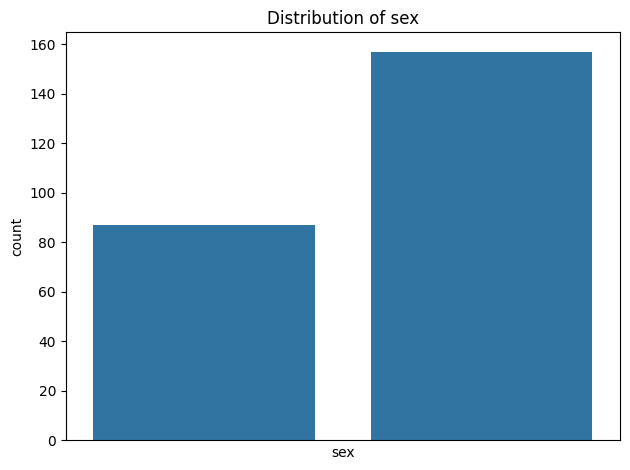

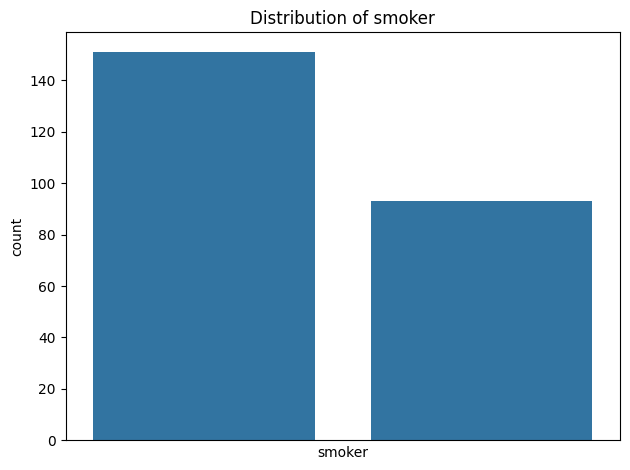

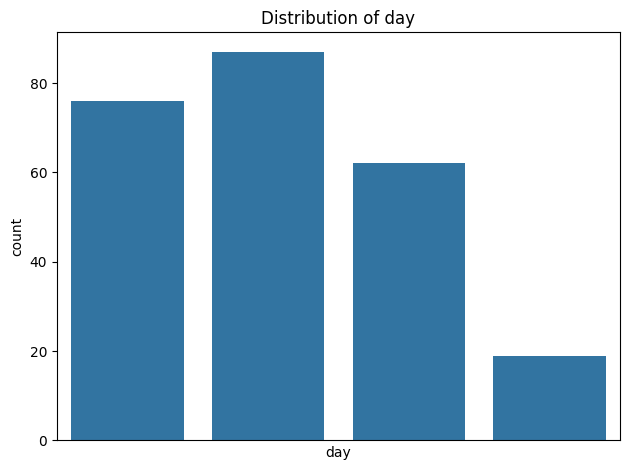

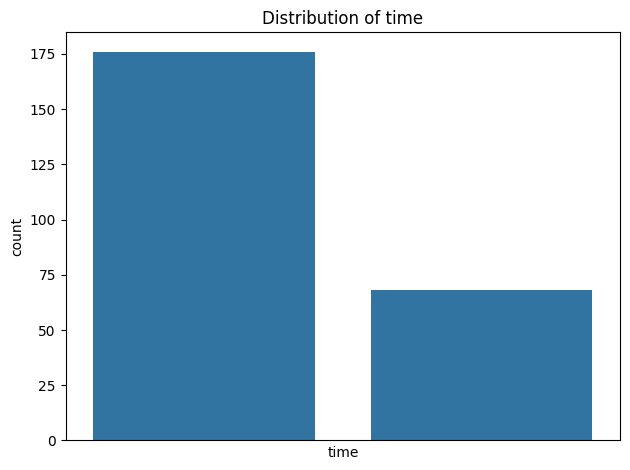

In [115]:
# Inspect value counts by categorical column
df['sex'].value_counts()

# Inspect value counts bfor all categorical column
for col in df.select_dtypes(include=['object', 'category']).columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.xticks([])   
    plt.xscale
    plt.tight_layout()
    plt.show()

plt.show()

### 7. Renaming and Adding Columns

In [116]:
df['Profession'] = 'Null'
df = df.rename(columns={'Profession': 'Occupation'})
print(df)

     total_bill   tip     sex smoker   day    time  size Occupation
0         16.99  1.01  Female     No   Sun  Dinner     2       Null
1         10.34  1.66    Male     No   Sun  Dinner     3       Null
2         21.01  3.50    Male     No   Sun  Dinner     3       Null
3         23.68  3.31    Male     No   Sun  Dinner     2       Null
4         24.59  3.61  Female     No   Sun  Dinner     4       Null
..          ...   ...     ...    ...   ...     ...   ...        ...
239       29.03  5.92    Male     No   Sat  Dinner     3       Null
240       27.18  2.00  Female    Yes   Sat  Dinner     2       Null
241       22.67  2.00    Male    Yes   Sat  Dinner     2       Null
242       17.82  1.75    Male     No   Sat  Dinner     2       Null
243       18.78  3.00  Female     No  Thur  Dinner     2       Null

[244 rows x 8 columns]


## 8.Initial Visualizations

### Firstly, I would like to explore the dependence of tip amount and sex. I will try to show how much on average each sex is tipping in the restaurant using a bargraph. This bargraph illustrates that average tips made by males are slight more than tips made by females.

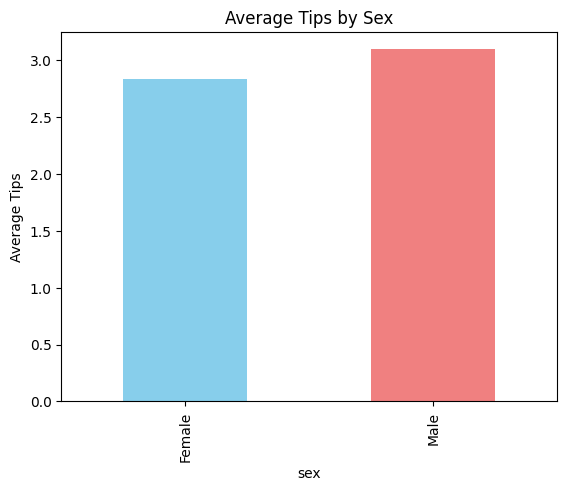

In [117]:
average_tips = df.groupby('sex')['tip'].mean()

# Plotting the average tips
average_tips.plot(kind='bar', color=['skyblue', 'lightcoral'])

# Add labels and title
plt.ylabel('Average Tips')
plt.title('Average Tips by Sex')

# Show the plot
plt.show()

### Secondly, I want to compare the total tips made at lunch versus dinner using bargraph. This bargraph illustrates that the restaurant makes the most amount of tips during dinner time. 

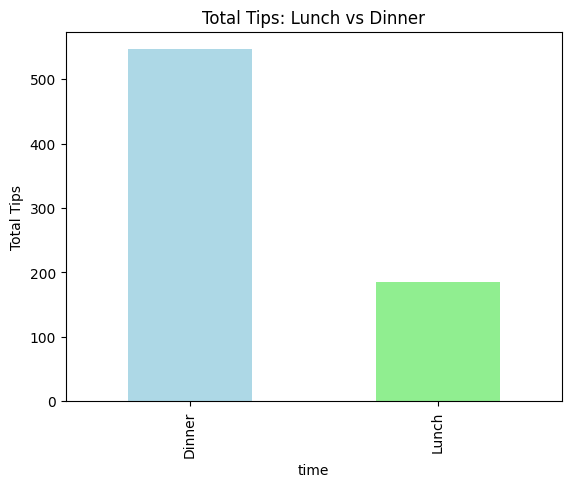

In [118]:
total_tips_by_time = df.groupby('time')['tip'].sum()

# Plotting the total tips
total_tips_by_time.plot(kind='bar', color=['lightblue', 'lightgreen'])

# Add labels and title
plt.ylabel('Total Tips')
plt.title('Total Tips: Lunch vs Dinner')

# Show the plot
plt.show()

### In this analysis, I compare the percentage of tips from total bill for each day. I used a line chart to show this difference and we can see that Friday is the day when customers the biggest percentage of total amount, followed by Sunday. Saturday was the day with the lowest percentage. 

In [119]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Group by day and calculate the average percentage of tips
tip_percentage_by_day = df.groupby('day')['tip_percentage'].mean().reset_index()

# Display the result
print(tip_percentage_by_day)

    day  tip_percentage
0   Fri       16.991303
1   Sat       15.315172
2   Sun       16.689729
3  Thur       16.127563


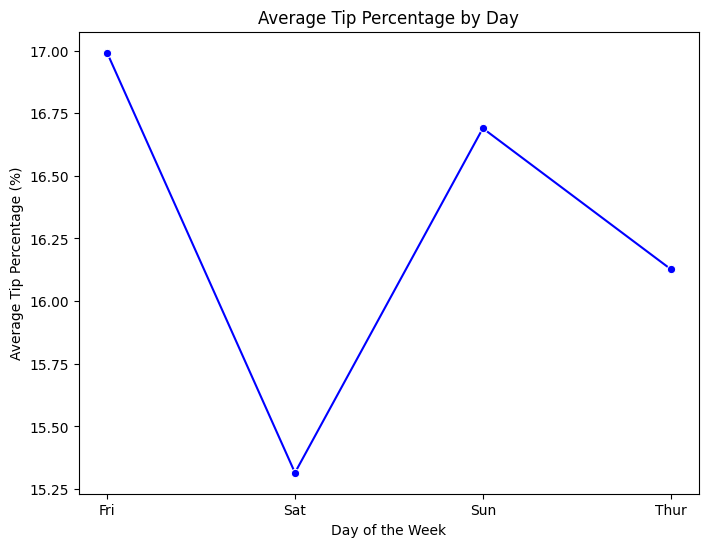

In [120]:
# Plotting the average percentage of tips for each day using a line plot
plt.figure(figsize=(8,6))
sns.lineplot(x='day', y='tip_percentage', data=tip_percentage_by_day, marker='o', color='b')

# Add labels and title
plt.ylabel('Average Tip Percentage (%)')
plt.xlabel('Day of the Week')
plt.title('Average Tip Percentage by Day')

# Show the plot
plt.show()

## Data Insights
- First graph showed us that on average males tip slightly higher than what their female counterparts usually tip
- We observed higher total amount of tips during dinner time than lunch
- Lastly, the graph illustrated the highest percentage from total bill on Friday and the lowest percentage on  Saturday

## Conclusion 
This data has collected essential insights into how tips are distributed among certain days, sex of the customers, time of the day and the week, size and smoking habits. Through the analysis, I found certain correlations between these factors and included them in my data insights.  